## EDA Strategies
When we start thinking about the typical __Data Science Workflow__, the first thing that comes to mind is the __data__ and the __EDA__. For a beginner it is always tricky question to come to a conclusion about from where to start. Just to bring in the needed clarity, here we try to suggest some __generic problems and the relevant approaches__ that can be used in order to overcome those problems. This will form a step by step approach that can be used while performing the EDAs.

1.  __Data Issues__: Generally the data on which we will be performing the EDA can be __numeric__ or __categorical__. We need to bring all the data at a single place from different sources. Once we collect the data at a single place, we can read the data into a data frame and perform pandas profiling to get the initial understanding of the data. The profiling will give all the necessary insights regarding the Null/NaN/missing values in the columns, duplicate rows, means of individual columns and much more.

 1.1 __Handling NaN/Null/Missing values__: There is no thumb rule which can give us the needed answer about handling these values. The possible options that a user can consider are:
              - delete the rows containing the missing values
              - if possible fill the missing value with the mean/mode/median of the column
              - if possible replace the missing value with the closest possible value by prediction 
              
   All these strategies are subject to the business and the use case for which the user in trying to find a solution.There are multiple factors affecting the approach that a user can take.

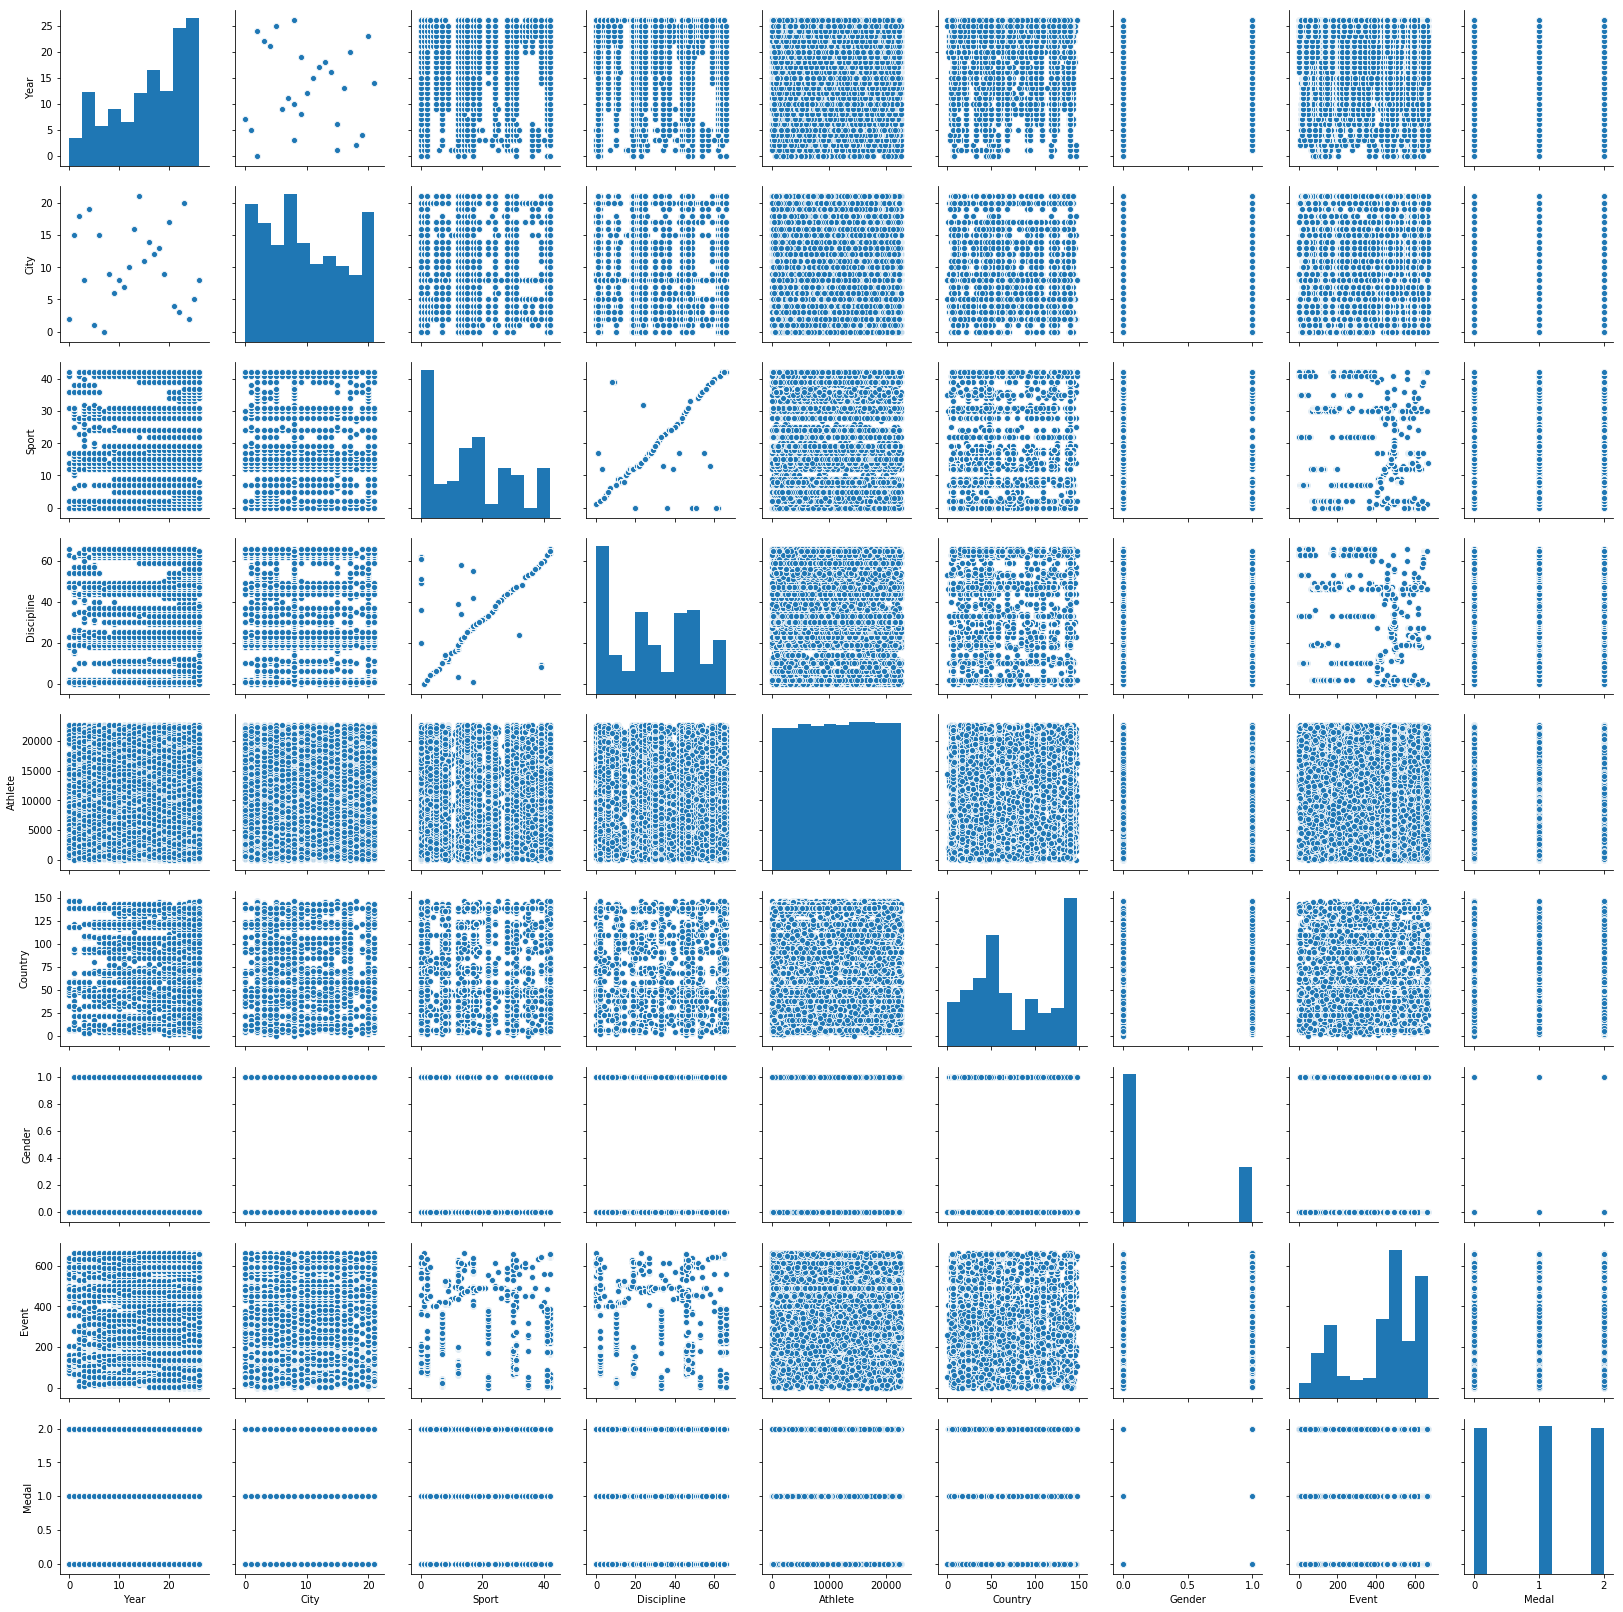

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline     

#Read Data
olympic = pd.read_csv("https://raw.githubusercontent.com/abhishekbiradar/DataScienceBlogs/master/summerolympics.csv")

olympic.dtypes

olympic.head()

olympic.describe(include = 'all') 
olympic.corr()

olympic_copy = olympic.copy(deep=True) 
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in olympic_copy.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    olympic_copy[i] = number.fit_transform(olympic_copy[i].astype('str'))
    
olympic_copy.describe()
features_correlation = olympic_copy.corr()
#plt.figure(figsize=(8,8))
#sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
#plt.show()
#sns.countplot(x="Country", data=olympic,hue="Medal",orient="h")

#preprofile = pandas_profiling.ProfileReport(olympic)
#preprofile.to_file(outputfile="F:\INSAID\summer_olympic_before_profiling.html")


#Drop duplicates
#olympic = olympic.drop_duplicates()

# Correct values for Athelete(for wrong Athlete name) and Country coulmns
#olympic['Athlete'] = olympic['Athlete'].replace('Pending','Dummy_Name')
#olympic['Country'] = olympic['Country'].fillna('ZZX')

#Another option is to directly ignore the the rows by filtering where no values are present for Country column
#olympic = olympic[olympic.Country.notnull()]

#Filter the data where Athlete name is 'Pending'
#olympic = olympic[olympic['Athlete'] != 'Pending']

#sns.barplot(x="Year",y="Gender",data=olympic_copy)
#sns.distplot(olympic_copy["Year"])
#sns.distplot(olympic_copy["Athlete"])
#sns.distplot(olympic_copy["Country"])
sns.pairplot(olympic_copy)

In [0]:
olympic_copy.describe()

Year          City  ...         Event         Medal
count  31165.000000  31165.000000  ...  31165.000000  31165.000000
mean      16.173560      9.801669  ...    418.614824      0.998107
std        7.414927      6.100722  ...    182.065735      0.814586
min        0.000000      0.000000  ...      0.000000      0.000000
25%       10.000000      5.000000  ...    246.000000      0.000000
50%       18.000000      9.000000  ...    477.000000      1.000000
75%       23.000000     15.000000  ...    575.000000      2.000000
max       26.000000     21.000000  ...    665.000000      2.000000

[8 rows x 9 columns]

In [4]:
ol_copy2 = pd.get_dummies(olympic)
ol_copy2.describe()

Year  City_Amsterdam  City_Antwerp   City_Athens  City_Atlanta  \
count  31165.000000    31165.000000  31165.000000  31165.000000  31165.000000   
mean    1970.482785        0.022782      0.041649      0.068956      0.059650   
std       33.158416        0.149210      0.199790      0.253383      0.236842   
min     1896.000000        0.000000      0.000000      0.000000      0.000000   
25%     1948.000000        0.000000      0.000000      0.000000      0.000000   
50%     1980.000000        0.000000      0.000000      0.000000      0.000000   
75%     2000.000000        0.000000      0.000000      0.000000      0.000000   
max     2012.000000        1.000000      1.000000      1.000000      1.000000   

       City_Barcelona  City_Beijing   City_Berlin  City_Helsinki  \
count    31165.000000  31165.000000  31165.000000   31165.000000   
mean         0.054709      0.065522      0.028076       0.028526   
std          0.227415      0.247449      0.165194       0.166472   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.000000      0.000000      0.000000       0.000000   
50%          0.000000      0.000000      0.000000       0.000000   
75%          0.000000      0.000000      0.000000       0.000000   
max          1.000000      1.000000      1.000000       1.000000   

        City_London      ...       Event_Wg 96 KG  Event_Yngling - Keelboat  \
count  31165.000000      ...         31165.000000              31165.000000   
mean       0.114455      ...             0.000128                  0.000578   
std        0.318369      ...             0.011329                  0.024026   
min        0.000000      ...             0.000000                  0.000000   
25%        0.000000      ...             0.000000                  0.000000   
50%        0.000000      ...             0.000000                  0.000000   
75%        0.000000      ...             0.000000                  0.000000   
max        1.000000      ...             1.000000                  1.000000   

       Event_York Round (100Y - 80Y - 60Y)  Event_Épée Individual  \
count                         31165.000000           31165.000000   
mean                              0.000096               0.002984   
std                               0.009811               0.054546   
min                               0.000000               0.000000   
25%                               0.000000               0.000000   
50%                               0.000000               0.000000   
75%                               0.000000               0.000000   
max                               1.000000               1.000000   

       Event_Épée Team  Event_Épée, Amateurs And Masters  Event_Épée, Masters  \
count     31165.000000                      31165.000000         31165.000000   
mean          0.012354                          0.000096             0.000096   
std           0.110460                          0.009811             0.009811   
min           0.000000                          0.000000             0.000000   
25%           0.000000                          0.000000             0.000000   
50%           0.000000                          0.000000             0.000000   
75%           0.000000                          0.000000             0.000000   
max           1.000000                          1.000000             1.000000   

       Medal_Bronze    Medal_Gold  Medal_Silver  
count  31165.000000  31165.000000  31165.000000  
mean       0.332713      0.336467      0.330820  
std        0.471192      0.472508      0.470516  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 23713 columns]

In [0]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import cufflinks as cf
%matplotlib notebook
%matplotlib inline     
#import plotly
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
#olympic.iplot()
from sklearn.feature_extraction import DictVectorizer as DV

vectorizer = DV( sparse = False )
ol_copy3 = vectorizer.fit_transform(olympic.drop("Year",axis=1).dropna())
ol_copy3.describe()

AttributeError: ignored

In [0]:
!pip install cufflinks

In [ ]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import cufflinks as cf
%matplotlib notebook
%matplotlib inline     
#import plotly
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
ol_copy2.iplot()
#olympic.iplot()

              
 1.2 __Normalizing Data Distribution__: 
 
 1.3 __Correcting Outliars__:
 

In [0]:
olympic.drop("Year",axis=1)

City      Sport  ...                       Event   Medal
0      Athens   Aquatics  ...              100M Freestyle    Gold
1      Athens   Aquatics  ...              100M Freestyle  Silver
2      Athens   Aquatics  ...  100M Freestyle For Sailors  Bronze
3      Athens   Aquatics  ...  100M Freestyle For Sailors    Gold
4      Athens   Aquatics  ...  100M Freestyle For Sailors  Silver
5      Athens   Aquatics  ...             1200M Freestyle  Bronze
6      Athens   Aquatics  ...             1200M Freestyle    Gold
7      Athens   Aquatics  ...             1200M Freestyle  Silver
8      Athens   Aquatics  ...              400M Freestyle  Bronze
9      Athens   Aquatics  ...              400M Freestyle    Gold
10     Athens   Aquatics  ...              400M Freestyle  Silver
11     Athens  Athletics  ...                        100M  Bronze
12     Athens  Athletics  ...                        100M  Bronze
13     Athens  Athletics  ...                        100M    Gold
14     Athens  Athletics  ...                        100M  Silver
15     Athens  Athletics  ...                110M Hurdles    Gold
16     Athens  Athletics  ...                110M Hurdles  Silver
17     Athens  Athletics  ...                       1500M  Bronze
18     Athens  Athletics  ...                       1500M    Gold
19     Athens  Athletics  ...                       1500M  Silver
20     Athens  Athletics  ...                        400M  Bronze
21     Athens  Athletics  ...                        400M    Gold
22     Athens  Athletics  ...                        400M  Silver
23     Athens  Athletics  ...                        800M  Bronze
24     Athens  Athletics  ...                        800M    Gold
25     Athens  Athletics  ...                        800M  Silver
26     Athens  Athletics  ...                Discus Throw  Bronze
27     Athens  Athletics  ...                Discus Throw    Gold
28     Athens  Athletics  ...                Discus Throw  Silver
29     Athens  Athletics  ...                   High Jump    Gold
...       ...        ...  ...                         ...     ...
31135  London  Wrestling  ...                    Wf 96 KG  Bronze
31136  London  Wrestling  ...                    Wf 96 KG  Bronze
31137  London  Wrestling  ...                   Wg 120 KG    Gold
31138  London  Wrestling  ...                   Wg 120 KG  Silver
31139  London  Wrestling  ...                   Wg 120 KG  Bronze
31140  London  Wrestling  ...                   Wg 120 KG  Bronze
31141  London  Wrestling  ...                    Wg 55 KG    Gold
31142  London  Wrestling  ...                    Wg 55 KG  Silver
31143  London  Wrestling  ...                    Wg 55 KG  Bronze
31144  London  Wrestling  ...                    Wg 55 KG  Bronze
31145  London  Wrestling  ...                    Wg 60 KG    Gold
31146  London  Wrestling  ...                    Wg 60 KG  Silver
31147  London  Wrestling  ...                    Wg 60 KG  Bronze
31148  London  Wrestling  ...                    Wg 60 KG  Bronze
31149  London  Wrestling  ...                    Wg 66 KG    Gold
31150  London  Wrestling  ...                    Wg 66 KG  Silver
31151  London  Wrestling  ...                    Wg 66 KG  Bronze
31152  London  Wrestling  ...                    Wg 66 KG  Bronze
31153  London  Wrestling  ...                    Wg 74 KG    Gold
31154  London  Wrestling  ...                    Wg 74 KG  Silver
31155  London  Wrestling  ...                    Wg 74 KG  Bronze
31156  London  Wrestling  ...                    Wg 74 KG  Bronze
31157  London  Wrestling  ...                    Wg 84 KG    Gold
31158  London  Wrestling  ...                    Wg 84 KG  Silver
31159  London  Wrestling  ...                    Wg 84 KG  Bronze
31160  London  Wrestling  ...                    Wg 84 KG  Bronze
31161  London  Wrestling  ...                    Wg 96 KG    Gold
31162  London  Wrestling  ...                    Wg 96 KG  Silver
31163  London  Wrestling  ...                    